In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [3]:
df = pd.read_csv('24-medical_cost.csv')

In [4]:
df.head()

,Id,age,sex,bmi,children,smoker,region,charges
0,1,19,female,27.900,0,yes,southwest,16884.92400
1,2,18,male,33.770,1,no,southeast,1725.55230
2,3,28,male,33.000,3,no,southeast,4449.46200
3,4,33,male,22.705,0,no,northwest,21984.47061
4,5,32,male,28.880,0,no,northwest,3866.85520


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 8 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Id        1338 non-null   int64  
 1   age       1338 non-null   int64  
 2   sex       1338 non-null   object 
 3   bmi       1338 non-null   float64
 4   children  1338 non-null   int64  
 5   smoker    1338 non-null   object 
 6   region    1338 non-null   object 
 7   charges   1338 non-null   float64
dtypes: float64(2), int64(3), object(3)
memory usage: 83.8+ KB


<Axes: xlabel='sex', ylabel='count'>

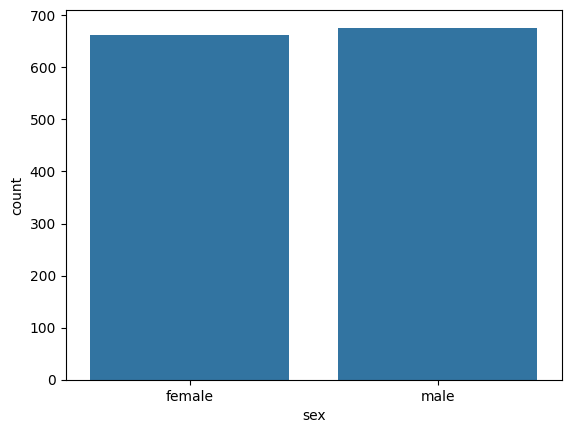

In [6]:
sns.countplot(x='sex', data=df)

<Axes: xlabel='smoker', ylabel='count'>

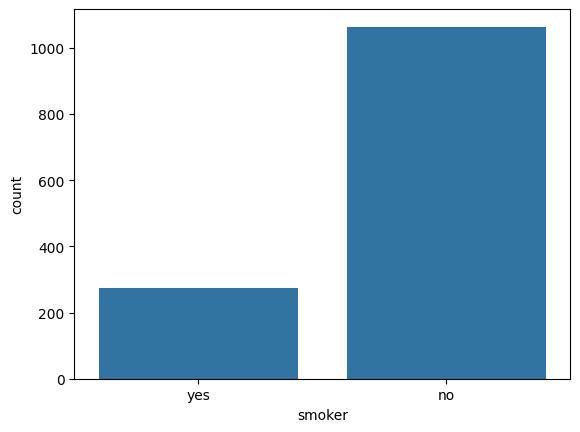

In [7]:
sns.countplot(x='smoker', data=df)

<Axes: xlabel='region', ylabel='count'>

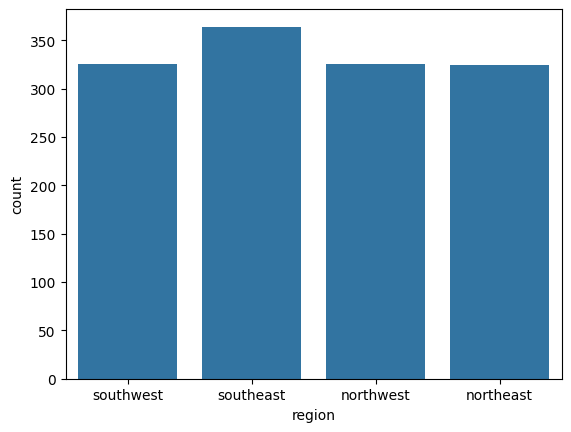

In [8]:
sns.countplot(x='region', data=df)

<Axes: xlabel='age', ylabel='charges'>

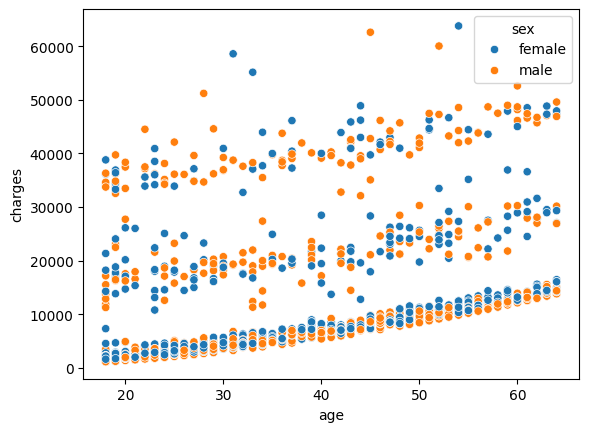

In [9]:
sns.scatterplot(x='age', y='charges',hue="sex", data=df)

<Axes: xlabel='bmi', ylabel='Count'>

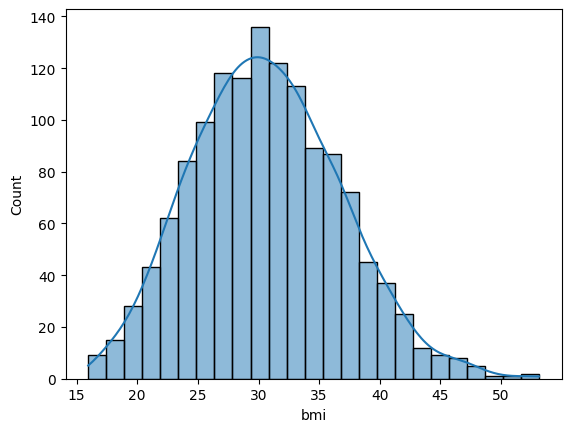

In [10]:
sns.histplot(data=df, x='bmi', kde=True)

<Axes: xlabel='charges', ylabel='Count'>

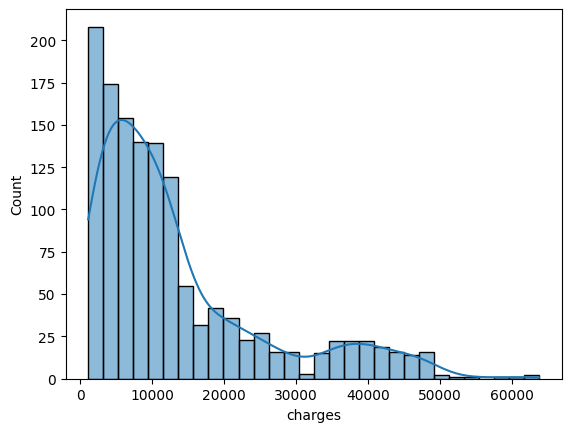

In [11]:
sns.histplot(data=df, x='charges', kde=True)

In [12]:
df.head()

,Id,age,sex,bmi,children,smoker,region,charges
0,1,19,female,27.900,0,yes,southwest,16884.92400
1,2,18,male,33.770,1,no,southeast,1725.55230
2,3,28,male,33.000,3,no,southeast,4449.46200
3,4,33,male,22.705,0,no,northwest,21984.47061
4,5,32,male,28.880,0,no,northwest,3866.85520


In [13]:
df.drop("Id", axis=1, inplace=True)

In [14]:
df["sex"] = df["sex"].map({"male":0, "female":1})
df["smoker"] = df["smoker"].map({"yes":1, "no":0})

In [15]:
df["sex"].value_counts()

sex
0    676
1    662
Name: count, dtype: int64

In [16]:
df["smoker"].value_counts()

smoker
0    1064
1     274
Name: count, dtype: int64

In [17]:
# one hot encoding

In [18]:
X = df.drop("charges", axis=1)
y = df["charges"]

In [19]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=15)

In [20]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder

In [21]:
categorical = ["region"]
preprocessor = ColumnTransformer(transformers=[
    ("cat", OneHotEncoder(drop="first", handle_unknown="ignore"), categorical)], remainder="passthrough")

In [22]:
X_train = preprocessor.fit_transform(X_train)
X_test = preprocessor.transform(X_test)

In [23]:
from lightgbm import LGBMRegressor
model = LGBMRegressor()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000349 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 319
[LightGBM] [Info] Number of data points in the train set: 1003, number of used features: 8
[LightGBM] [Info] Start training from score 13374.181390


c:\Users\irm\miniconda3\Lib\site-packages\sklearn\utils\validation.py:2749: UserWarning: X does not have valid feature names, but LGBMRegressor was fitted with feature names
  warnings.warn(


In [24]:
from sklearn.metrics import mean_squared_error, r2_score
print(mean_squared_error(y_test, y_pred))
print(r2_score(y_test, y_pred))

18458085.613847945
0.871843376594573


In [25]:
#hyperparameter tuning 

In [26]:
param_grid = {
    'num_leaves': [31, 50, 70],
    'learning_rate': [0.01, 0.05, 0.1],
    'n_estimators': [100, 200, 500, 1000],
    "max_depth": [ -1, 5, 10, 20, 30],
    "min_child_samples": [20, 30, 50, 100],
    "subsample": [0.6, 0.8, 1.0],
    "colsample_bytree": [0.6, 0.8, 1.0],
    "reg_alpha": [0, 0.1, 0.5, 1.0],
    "reg_lambda": [0, 0.1, 0.5, 1.0]
}

In [27]:
from sklearn.model_selection import RandomizedSearchCV

In [28]:
import warnings
warnings.filterwarnings("ignore")

In [29]:
random_search = RandomizedSearchCV(estimator=LGBMRegressor(verbosity = -1), param_distributions=param_grid, scoring='neg_mean_squared_error', cv=5, verbose=0, random_state=15, n_jobs=-1)
random_search.fit(X_train, y_train)

,estimator,LGBMRegressor(verbosity=-1)
,param_distributions,"{'colsample_bytree': [0.6, 0.8, ...], 'learning_rate': [0.01, 0.05, ...], 'max_depth': [-1, 5, ...], 'min_child_samples': [20, 30, ...], ...}"
,n_iter,10
,scoring,'neg_mean_squared_error'
,n_jobs,-1
,refit,True
,cv,5
,verbose,0
,pre_dispatch,'2*n_jobs'
,random_state,15
,error_score,nan


In [30]:
random_search.best_params_

{'subsample': 0.8,
 'reg_lambda': 0.5,
 'reg_alpha': 0,
 'num_leaves': 50,
 'n_estimators': 100,
 'min_child_samples': 30,
 'max_depth': 5,
 'learning_rate': 0.05,
 'colsample_bytree': 0.8}

In [31]:
y_pred = random_search.predict(X_test)

In [32]:
print(mean_squared_error(y_test, y_pred))
print(r2_score(y_test, y_pred))

14103265.384983672
0.902079397151883


In [33]:
# transformation

In [34]:
from scipy.stats import boxcox

In [36]:
y_train_transformed, lambda_y=boxcox(y_train) 


In [37]:
model = LGBMRegressor(verbosity = -1)
model.fit(X_train, y_train_transformed)

,boosting_type,'gbdt'
,num_leaves,31
,max_depth,-1
,learning_rate,0.1
,n_estimators,100
,subsample_for_bin,200000
,objective,None
,class_weight,None
,min_split_gain,0.0
,min_child_weight,0.001
,min_child_samples,20


In [40]:
y_pred_transformed = model.predict(X_test)

In [41]:
def inverse_boxcox(y, lambda_):
    if lambda_ == 0:
        return np.exp(y)
    else:
        return np.power(y * lambda_ +1, 1 / lambda_)

In [42]:
y_pred_original = inverse_boxcox(y_pred_transformed, lambda_y)

In [45]:
print(mean_squared_error(y_pred_original, y_test, ))
print(r2_score(y_pred_original, y_test))

15470028.378876308
0.8895535054323228
